____________________________________________________________________________
**Import required libraries and modules**
____________________________________________________________________________

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

____________________________________________________________________________
**Read the data and get required information**
____________________________________________________________________________

In [78]:
df = pd.read_csv('Desktop/DS/PROJECTS/TECH_IS/kmean/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [79]:
df.shape

(683277, 22)

____________________________________________________________________________
**Get statistical information**
____________________________________________________________________________

In [80]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [81]:
df.nunique()

Organization Group Code         7
Job Family Code                59
Job Code                     1210
Year Type                       2
Year                            8
Organization Group              7
Department Code                60
Department                    109
Union Code                     70
Union                         129
Job Family                     59
Job                          1349
Employee Identifier        309750
Salaries                   498512
Overtime                   262033
Other Salaries             307854
Total Salary               615223
Retirement                 451716
Health and Dental          209969
Other Benefits             496200
Total Benefits             616499
Total Compensation         658692
dtype: int64

In [82]:
Missing_value = df.isna().sum()
Missing_value

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [83]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

____________________________________________________________________________
**Data Preprocessing**
____________________________________________________________________________

As we can see Union and Union code columns have more missing values then actual unuqie values. Decided to drop those columns.

In [84]:
df = df.drop('Union Code', axis = 1)
df = df.drop('Union', axis = 1)

We have to deal with unknown values in Department, Department code and Job columns, keep it in mind for klustering project we need only numeric features, but if we want to use another model it's good way to fix missing values instead of just drop it.

In [85]:
df['Department Code'] = df['Department Code'].fillna(df['Department Code'].mode()[0])
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
#df['Job'] = df['Job'].fillna(df['Job'].mod()[0])

The Job code column features are numbers, but it has object dtype, we need to fix it properly

In [86]:
df['Job Code'] = pd.to_numeric(df['Job Code'], errors='coerce').fillna(0).astype(np.int64)

Now we making same DataFrame, one for clustering, another one we can use for Random Forest from, KNeighbors, LinearRegression and also apply GradientBoostingRegressor

In [87]:
df_for_linear = df.copy()

We going to apply dropna() function, which is used to remove all missing values from original DataFrame

In [88]:
df = df.dropna()

In [89]:
missing_value = df.isna().sum()
missing_value

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

____________________________________________________________________________
**Exploratory Data Analysis**
____________________________________________________________________________

We should always check for outliers in boxplot whenever possible, even if you are using a model that has little effect. The impact of outliers can be seen not only in predictive modeling but also in statistical tests where it reduces the power of tests. Most parametric statistics, like means, standard deviations, and correlations, and every statistic based on these, are highly sensitive to outliers.

<AxesSubplot:>

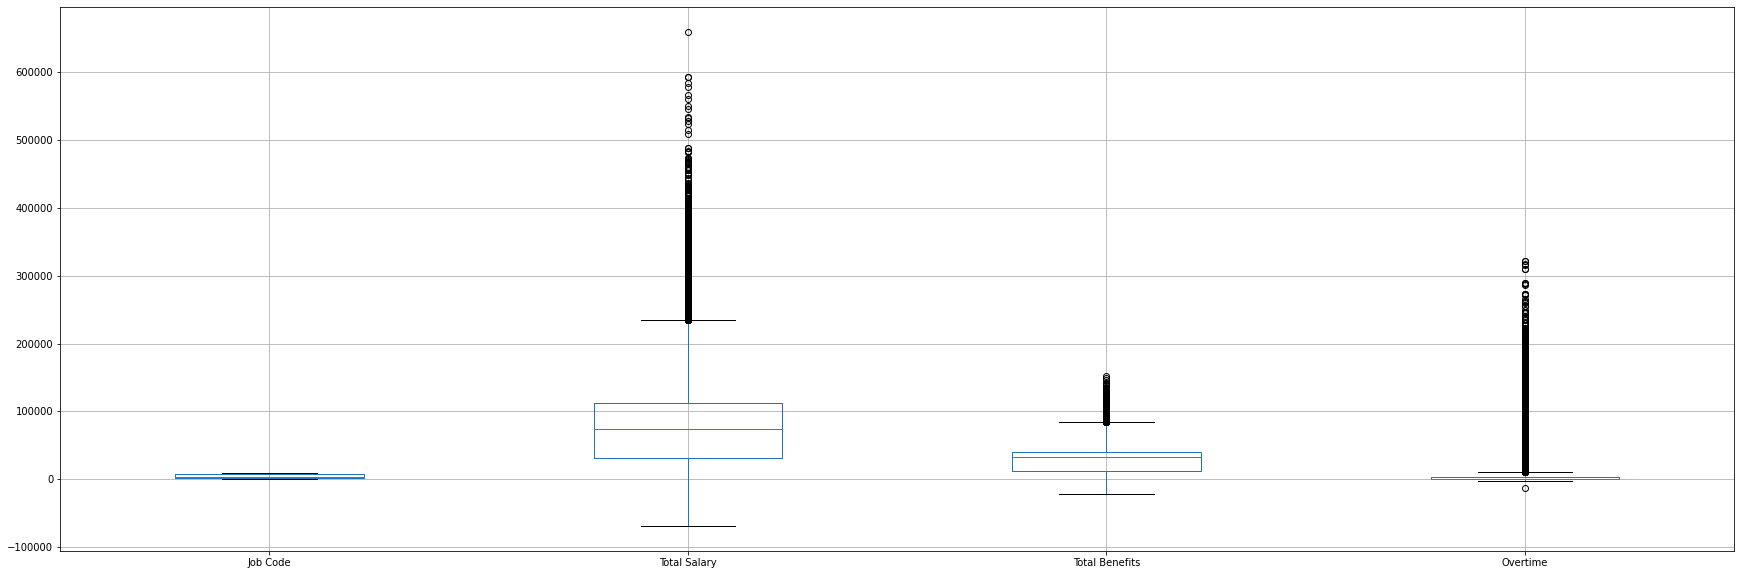

In [90]:
df.boxplot(column= ['Job Code', 'Total Salary', 'Total Benefits', 'Overtime'],figsize=(30,10))

As we can see below 2 graphs below, General City Responsibilities have the lowest salary level. We see Public Protection has the highest average salaries.

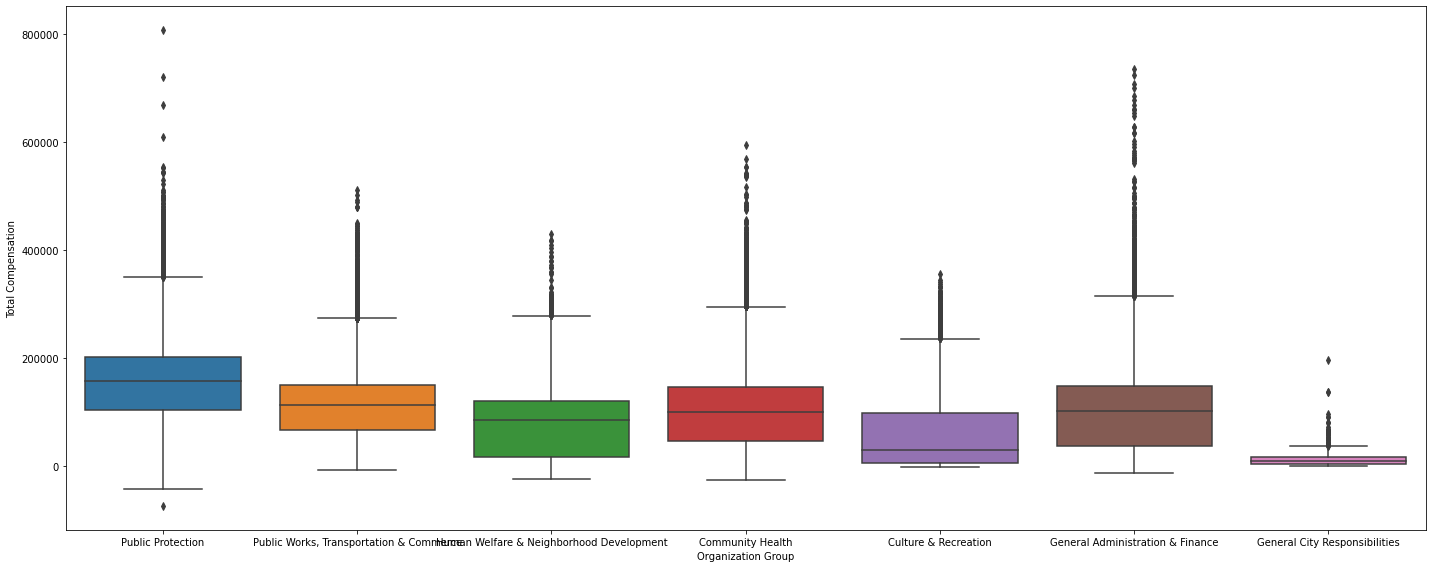

In [91]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="Organization Group", y="Total Compensation", data=df)
plt.tight_layout()

General City Responsibilities have the highest density, which means a large number of jobs, but salary level ptretty low. We can also select a group Culture and Recreation wich visually has median number of jobs and salary. 2 different plots show us information how San Francisco administration spending on salary and number of jobs.

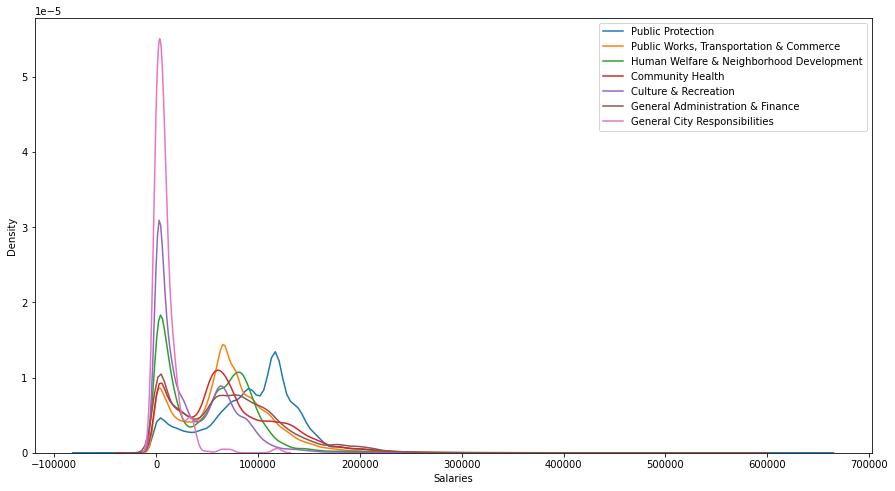

In [92]:
plt.figure(figsize=(15,8))
for col in list(df['Organization Group'].unique()):
    sns.kdeplot(df['Salaries'][df['Organization Group'] == col])
    plt.legend(df['Organization Group'].unique())

The graph below shows that total compensation covers everything included in salary and total salary, which is logically justified. However, you can see the gap between total compensation and total salary and conclude that the higher the total salary, the lower the gap between total benefits and total salary, which means that workers with high salaries do not feel much of the effects of benefits.

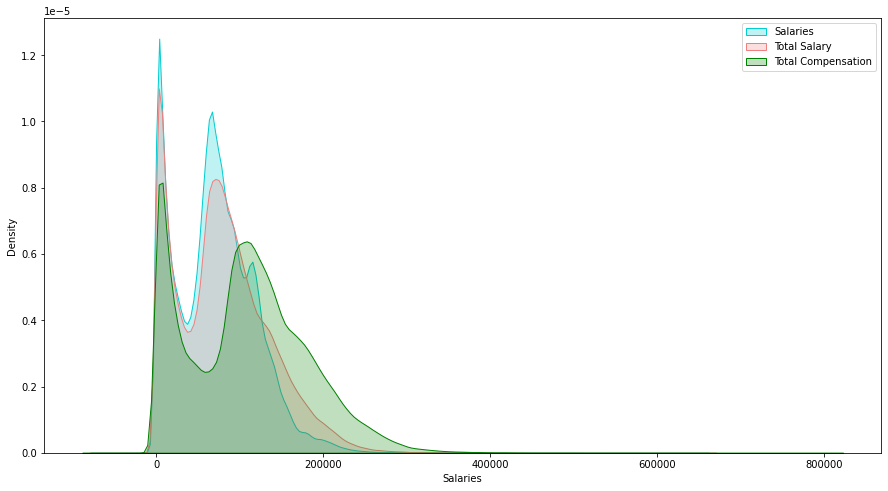

In [93]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['Salaries'], color="darkturquoise", shade=True)
sns.kdeplot(df['Total Salary'], color="lightcoral", shade=True)
sns.kdeplot(df['Total Compensation'], color="green", shade=True)
plt.legend(['Salaries','Total Salary','Total Compensation'])
plt.show()


The graph below shows us that more employees receive health and dental benefits, but visually we can say that this is a quarter of the total benefits. The retirement does include good proportion of density and at the same time half of employees receive third or less of all retirement benefits. It can be concluded that small part of the employees has more benefits, then others.

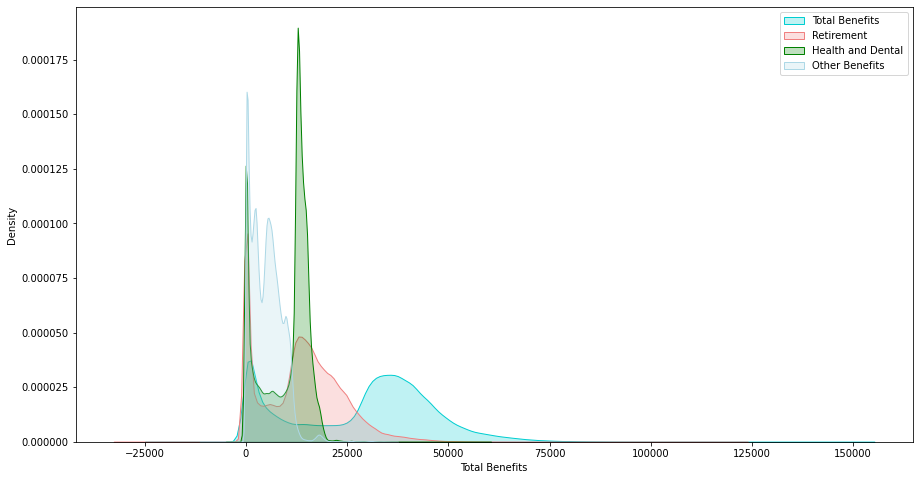

In [94]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['Total Benefits'], color="darkturquoise", shade=True)
sns.kdeplot(df['Retirement'], color="lightcoral", shade=True)
sns.kdeplot(df['Health and Dental'], color="green", shade=True)
sns.kdeplot(df['Other Benefits'], color="lightblue", shade=True)
plt.legend(['Total Benefits','Retirement','Health and Dental','Other Benefits'])
plt.show()

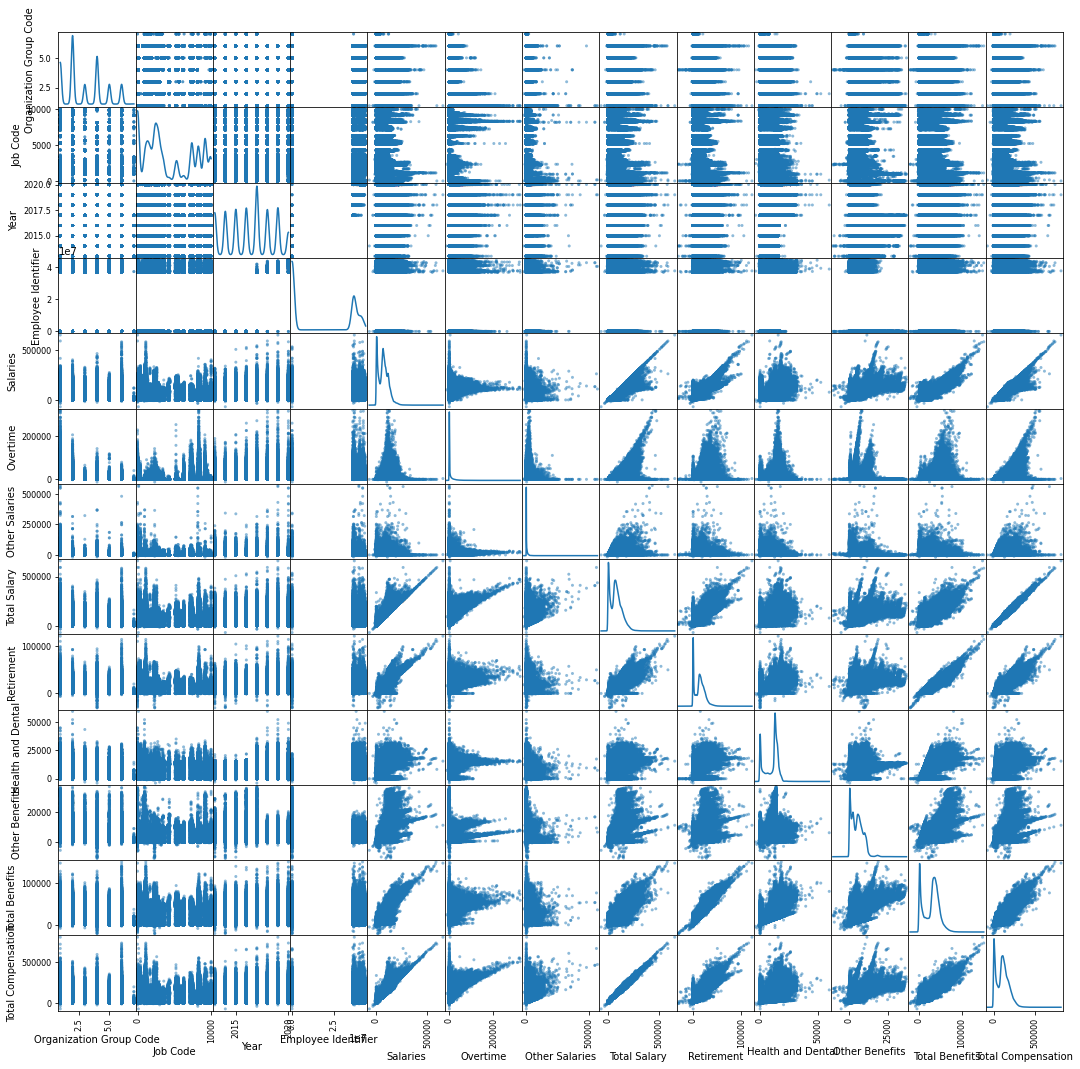

In [95]:
scatter_matrix(df, alpha=0.5, figsize=(18, 18), diagonal='kde')
plt.show()

We can see the correlations in the field of material goods as salaries and all benefits, it is significant and this is expected

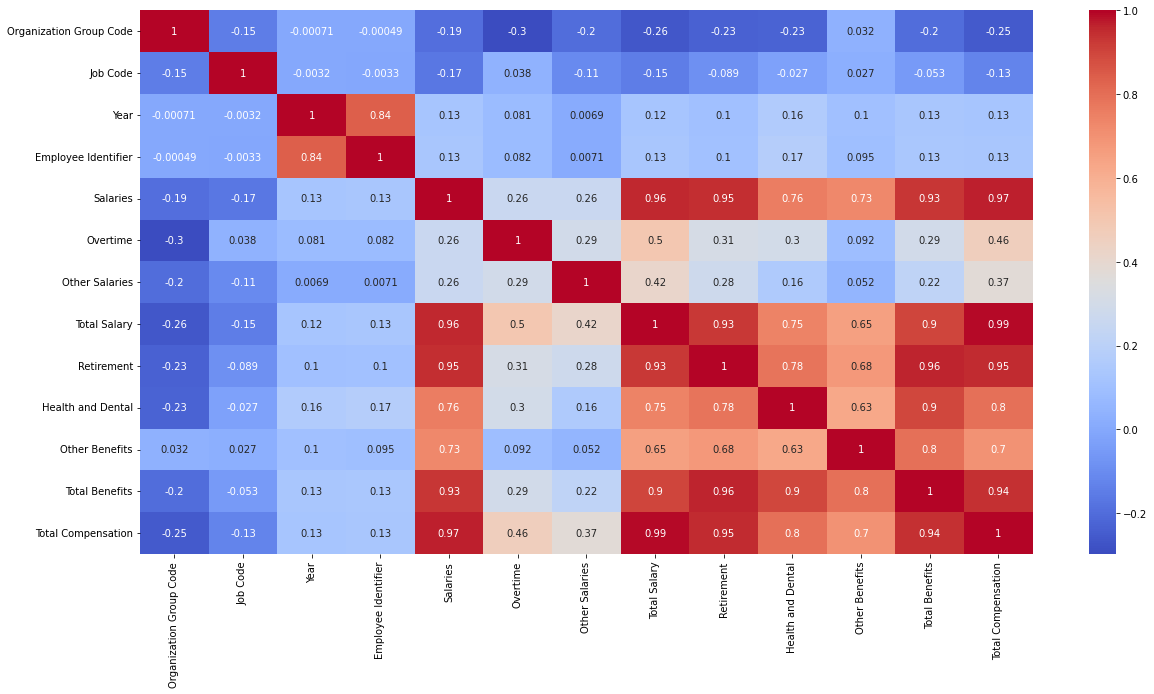

In [96]:
plt.figure(figsize=(20,10))
corre = df.corr()
sns.heatmap(corre,annot=True,cmap='coolwarm')
plt.show()

____________________________________________________________________________
**Feature selection**
____________________________________________________________________________

As we know clustering model requires numeric features. We are going to use only integer and float.

In [97]:
#df.drop({'Organization Group Code','Year','Union Code','Employee Identifier','Overtime','Other Salaries'},axis=1,inplace=True)

In [98]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                     int64
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [99]:
df1 = df.select_dtypes(include=('int64','float64'))
df1.columns

Index(['Organization Group Code', 'Job Code', 'Year', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [100]:
df1.head()

,Organization Group Code,Job Code,Year,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1021,2013,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1023,2013,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1031,2013,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1054,2013,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1062,2013,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [101]:
df1.drop(['Salaries', 'Total Salary','Other Benefits', 'Total Benefits'],axis=1,inplace=True)

We decided to merge Retirement and Health and Dental and get 1 column, wich we are goint to use for cluster model

In [102]:
df1['health and retirement']=df1['Retirement']+df1['Health and Dental']

Drop unnesessary column

In [103]:
df1.drop(['Retirement','Health and Dental'],axis=1,inplace=True)

In [104]:
df1.drop(['Organization Group Code','Job Code','Year','Employee Identifier','Overtime','Other Salaries'],axis=1,inplace=True)
df1.head()

,Total Compensation,health and retirement
0,85281.78,23214.50
1,79895.32,17461.68
2,93649.71,25414.07
3,134237.37,32562.69
4,7512.31,2040.81


____________________________________________________________________________
**Model selection and training**
____________________________________________________________________________

In [105]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df1)
print(scaled)

[[0.18074512 0.32026192]
 [0.174636   0.28603925]
 [0.19023571 0.33334684]
 ...
 [0.2419989  0.3864561 ]
 [0.27050626 0.4169251 ]
 [0.27164402 0.4169251 ]]


In [106]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)

KMeans(n_clusters=3)

In [107]:
print(kmeans.cluster_centers_)

[[115521.45684163  27607.20241565]
 [ 23436.36497302   4982.33061379]
 [207593.05169211  41409.41805352]]


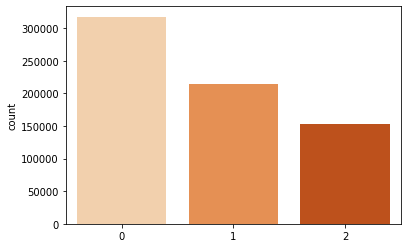

In [108]:
sns.countplot(x = kmeans.labels_, palette = 'Oranges')
plt.show();

In [109]:
df['labels'] = kmeans.labels_

Text(0, 0.5, 'Total Benefits')

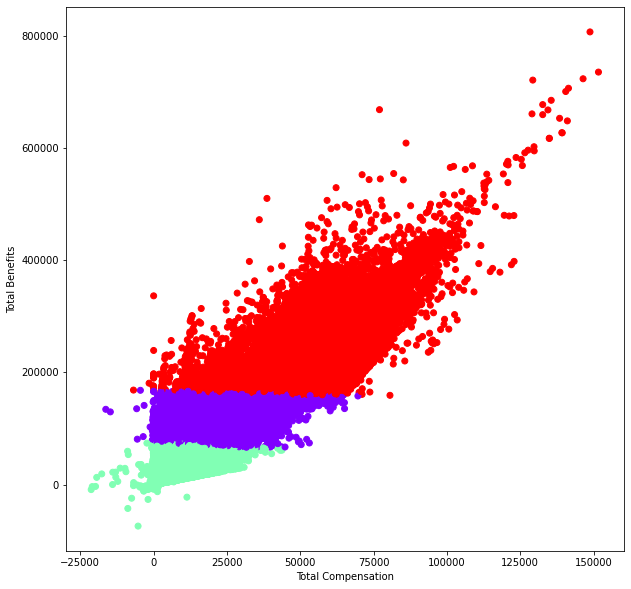

In [110]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df['Total Benefits'], y = df['Total Compensation'],c=df['labels'], cmap='rainbow')
plt.xlabel('Total Compensation')
plt.ylabel('Total Benefits')

In [111]:
y = kmeans.predict(df1)

**Elbow and Average silhouette methods**

In [112]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [113]:
K = range(1,10)
X = df[['Total Benefits', 'Total Compensation']]
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [114]:
df1.head()

,Total Compensation,health and retirement
0,85281.78,23214.50
1,79895.32,17461.68
2,93649.71,25414.07
3,134237.37,32562.69
4,7512.31,2040.81


In [115]:
#wcss = [sum(d**2) for d in dist]
#tss = sum(pdist(X)**2)/X.shape[0]
#bss = tss-wcss
#varExplained = bss/tss*100

In [116]:
#K = range(1,10)
#X = df1
#KM = [KMeans(n_clusters=k).fit(df1) for k in K]
#centroids = [k.cluster_centers_ for k in KM]
#D_k = [cdist(df1, cent, 'euclidean') for cent in centroids]
#cIdx = [np.argmin(D,axis=1) for D in D_k]
#dist = [np.min(D,axis=1) for D in D_k]
#avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [117]:
#wcss = [sum(d**2) for d in dist]
#tss = sum(pdist(X)**2)/X.shape[0]
#bss = tss-wcss
#varExplained = bss/tss*100

In [118]:
kIdx = 10-1

Text(0.5, 1.0, 'Elbow for KMeans clustering')

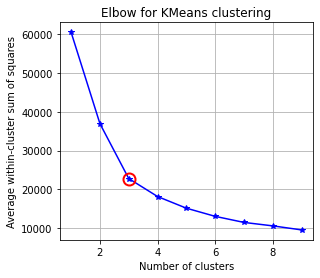

In [119]:
##### plot ###
kIdx = 2
# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
#plt.subplot(1, 2, 2)
#plt.plot(K, varExplained, 'b*-')
#plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
#markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
#plt.grid(True)
#plt.xlabel('Number of clusters')
#plt.ylabel('Percentage of variance explained')
#plt.title('Elbow for KMeans clustering')
#plt.tight_layout()

In [120]:
#from sklearn.metrics import silhouette_samples,silhouette_score

In [121]:
#from sklearn.metrics import silhouette_score
#from matplotlib import cm

In [122]:
#silhouette_score(df1,y)

In [123]:
#score = []
#for n_clusters in range(2,10):
    #kmeans = KMeans(n_clusters=n_clusters)
    #kmeans.fit(df1)
    #labels = kmeans.labels_
    #centroids = kmeans.cluster_centers_
    #score.append(silhouette_score(X, labels, metric='euclidean'))

In [124]:
# Set the size of the plot
#plt.figure(figsize=(10,4))
#plt.subplot(1, 2, 1)
#plt.plot(score)
#plt.grid(True)
#plt.ylabel("Silouette Score")
#plt.xlabel("k")
#plt.title("Silouette for K-means")